In [ ]:


import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
!pip install transformers
!pip install torch
!pip install evaluate
!pip install scikit-learn
!pip install pandas
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.4 MB/s eta 0:00:00



Evaluating gpt2 ...


Loading weights:   0%|          | 0/148 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



Evaluating distilgpt2 ...


Loading weights:   0%|          | 0/76 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



Evaluating EleutherAI/gpt-neo-125M ...


Loading weights:   0%|          | 0/160 [00:00<?, ?it/s]

GPTNeoForCausalLM LOAD REPORT from: EleutherAI/gpt-neo-125M
Key                                                   | Status     |  | 
------------------------------------------------------+------------+--+-
transformer.h.{0...11}.attn.attention.masked_bias     | UNEXPECTED |  | 
transformer.h.{0, 2, 4, 6, 8, 10}.attn.attention.bias | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



Evaluating EleutherAI/gpt-neo-1.3B ...


Loading weights:   0%|          | 0/316 [00:00<?, ?it/s]

GPTNeoForCausalLM LOAD REPORT from: EleutherAI/gpt-neo-1.3B
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
transformer.h.{0...23}.attn.attention.masked_bias | UNEXPECTED |  | 
transformer.h.{0...22}.attn.attention.bias        | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



Evaluating EleutherAI/gpt-neo-2.7B ...


Loading weights:   0%|          | 0/420 [00:00<?, ?it/s]

GPTNeoForCausalLM LOAD REPORT from: EleutherAI/gpt-neo-2.7B
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
transformer.h.{0...31}.attn.attention.masked_bias | UNEXPECTED |  | 
transformer.h.{0...30}.attn.attention.bias        | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



Decision Matrix:
                               Time  Length  Repetition   Size
gpt2                      12.558358     224         106    500
distilgpt2                 8.976235     140         114    250
EleutherAI/gpt-neo-125M   12.626682     201          82    520
EleutherAI/gpt-neo-1.3B   84.722383     212          66   5000
EleutherAI/gpt-neo-2.7B  179.609851     215          71  10000
a1: 0.81
a2: 0.81
a3: 0.89
a4: 0.56
a5: 0.17


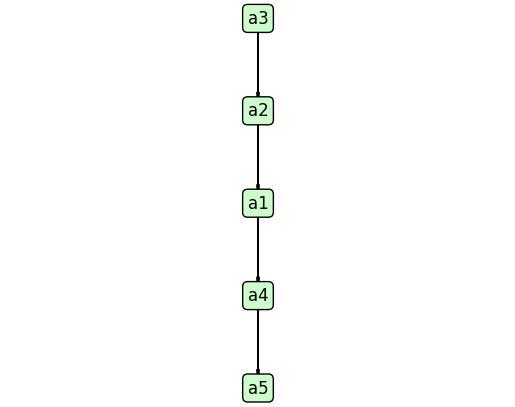


Final Ranking Using TOPSIS:
                               Time  Length  Repetition   Size  TOPSIS Score
EleutherAI/gpt-neo-125M   12.626682     201          82    520      0.892513
distilgpt2                 8.976235     140         114    250      0.813260
gpt2                      12.558358     224         106    500      0.810601
EleutherAI/gpt-neo-1.3B   84.722383     212          66   5000      0.556964
EleutherAI/gpt-neo-2.7B  179.609851     215          71  10000      0.171048


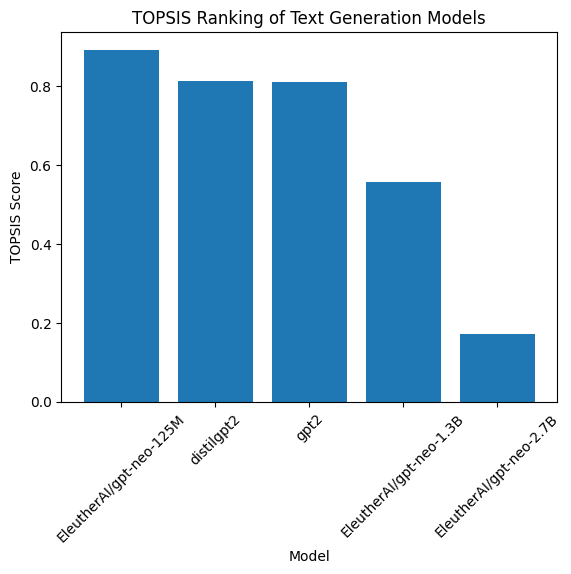


Best Model According to TOPSIS: EleutherAI/gpt-neo-125M


In [17]:
!pip install transformers torch pyDecision pandas numpy matplotlib -q

import time
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline
from pyDecision.algorithm.topsis import topsis_method

models = [
    "gpt2",
    "distilgpt2",
    "EleutherAI/gpt-neo-125M",
    "EleutherAI/gpt-neo-1.3B",
    "EleutherAI/gpt-neo-2.7B"
]

prompt = "Artificial Intelligence is transforming the world by"

def evaluate_model(model_name):
    print(f"\nEvaluating {model_name} ...")
    
    try:
        generator = pipeline(
            "text-generation",
            model=model_name,
            device=0 if torch.cuda.is_available() else -1
        )
        
        start = time.time()
        output = generator(prompt, max_length=60, num_return_sequences=1)
        end = time.time()
        
        gen_time = end - start
        
        text = output[0]['generated_text']
        words = text.split()
        
        length = len(words)
        repetition = len(words) - len(set(words))
        
        model_sizes = {
            "gpt2": 500,
            "distilgpt2": 250,
            "EleutherAI/gpt-neo-125M": 520,
            "EleutherAI/gpt-neo-1.3B": 5000,
            "EleutherAI/gpt-neo-2.7B": 10000
        }
        
        size = model_sizes.get(model_name, 1000)
        
        return gen_time, length, repetition, size
    
    except Exception as e:
        print("Error loading:", model_name)
        return None

results = []
valid_models = []

for model in models:
    metrics = evaluate_model(model)
    if metrics is not None:
        results.append(metrics)
        valid_models.append(model)

df = pd.DataFrame(results, columns=["Time", "Length", "Repetition", "Size"])
df.index = valid_models

print("\nDecision Matrix:")
print(df)

weights = [0.3, 0.2, 0.3, 0.2]

criteria = [-1, 1, -1, -1]

decision_matrix = df.values

scores = topsis_method(decision_matrix, weights, criteria)

df["TOPSIS Score"] = scores

df = df.sort_values(by="TOPSIS Score", ascending=False)

print("\nFinal Ranking Using TOPSIS:")
print(df)

plt.figure()
plt.bar(df.index, df["TOPSIS Score"])
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Ranking of Text Generation Models")
plt.show()

best_model = df.index[0]
print(f"\nBest Model According to TOPSIS: {best_model}")